In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns

In [6]:
students_data=pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [7]:
students_data_with_name=students_data.iloc[[0,3,4,7,8]]

In [8]:
students_data_with_name.index=['Serhei','And', "Poli", 'Kate', 'Igor']

In [9]:
students_data_with_name.loc[['Serhei', 'Poli']]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Serhei,female,group B,bachelor's degree,standard,none,72,72,74
Poli,male,group C,some college,standard,none,76,78,75


In [10]:
students_data_with_name.iloc[:,0]

Serhei    female
And         male
Poli        male
Kate        male
Igor        male
Name: gender, dtype: object

In [11]:
my_series_1=pd.Series([1,2,3], index=['Serhei','And', "Poli"])
my_series_2=pd.Series([4,5,6], index=['Serhei','And', "Poli"])

In [12]:
pd.DataFrame({'col_name_1':my_series_1, 'col_name_2':my_series_2})

,col_name_1,col_name_2
Serhei,1,4
And,2,5
Poli,3,6


In [13]:
students_data_with_name['gender'].shape

(5,)

In [14]:
b=len(students_data)

In [15]:
students_data.loc[students_data.lunch=='free/reduced'].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
17,female,group B,some high school,free/reduced,none,18,32,28


In [16]:
a=len(students_data.loc[students_data.lunch=='standard'])

In [17]:
stud_standart_mean=students_data[students_data['lunch']=='free/reduced'].mean()

In [29]:
stud_standart_mean['writing score']

63.02253521126761

In [18]:
stud_standart_var=students_data[students_data['lunch']=='standard'].mean()


In [19]:
stud_reduce_var=students_data[students_data['lunch']=='free/reduced'].var()

In [20]:
stud_reduce_mean=students_data[students_data['lunch']=='standard'].var()

In [21]:
pd.DataFrame({'reduce_var':stud_reduce_var,'standart_var':stud_reduce_mean,'standart_mean':stud_standart_var,'reduce_mean':stud_standart_mean})

,reduce_var,standart_var,standart_mean,reduce_mean
math score,229.824270,186.418089,70.034109,58.921127
reading score,221.871139,191.285560,71.654264,64.653521
writing score,238.202881,205.620887,70.823256,63.022535


In [22]:
students_data.shape

(1000, 8)

In [25]:
students_data.loc[students_data.gender=='male'].head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52


In [30]:
quory=(students_data['writing score']>stud_standart_mean['writing score']) & (students_data.gender=='male')

In [31]:
students_data[quory].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
4,male,group C,some college,standard,none,76,78,75
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80


In [ ]:
students_data.loc[:, ['gender','math score']]

In [32]:
students_data=students_data.rename(columns={
                                            'parental level of education' : 'parental_level_of_education',
    'test preparation course' : 'test_preparation_course',
    'reading score' : 'reading_score',
    'writing score' : 'writing_score',
    'math score': 'math_score'
    
})

In [33]:
students_data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
writing_score_query=90

In [37]:
students_data.query('gender=="female" & writing_score>@writing_score_query').head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
94,female,group B,some college,standard,none,79,86,92
106,female,group D,master's degree,standard,none,87,100,100
110,female,group D,associate's degree,free/reduced,completed,77,89,98


In [38]:
score_column=[i for i in list(students_data) if 'score' in i]

In [39]:
students_data[score_column].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [40]:
students_data.filter(like='score').head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [41]:
students_data_with_name.filter(like='e', axis=0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Serhei,female,group B,bachelor's degree,standard,none,72,72,74
Kate,male,group B,some college,free/reduced,none,40,43,39


In [42]:
students_data.groupby(['gender', 'race/ethnicity'], as_index=False).aggregate({'math_score' :  'mean', 'reading_score' : 'mean'})

,gender,race/ethnicity,math_score,reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [43]:
students_data.reading_score.nunique()

72

In [44]:
students_data.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [45]:
students_data.sort_values(['gender', 'math_score'], ascending=False) \
.groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [46]:
students_data['total_score']=students_data.math_score+students_data.reading_score+students_data.writing_score


In [48]:
students_data['total_score'].head()

0    218
1    247
2    278
3    148
4    229
Name: total_score, dtype: int64

In [49]:
students_data=students_data.assign(total_score_log=np.log(students_data.total_score))

In [52]:
students_data.drop(['total_score', 'total_score_log'], axis=1).head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [53]:
dota_leg=pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [54]:
dota_leg.groupby('legs').count().head()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [55]:
dota_leg.groupby(['attack_type', 'primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

In [56]:
salary=pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')

In [57]:
salary

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184
5,5,Loopa,F,232
6,6,Loopa,B,249
7,7,Pupa,F,195
8,8,Pupa,A,115
9,9,Pupa,E,65


In [58]:
salary.groupby(['Type', 'Executor']).mean()['Salary']

Type  Executor
A     Loopa        58.000000
      Pupa        160.833333
B     Loopa       145.166667
      Pupa         77.000000
C     Loopa       154.333333
      Pupa         74.500000
D     Loopa       137.714286
      Pupa        146.500000
E     Loopa       164.000000
      Pupa        131.200000
F     Loopa       238.000000
      Pupa        136.250000
Name: Salary, dtype: float64

In [59]:
concentrations=pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')

In [60]:
concentrations.groupby(['genus'], as_index=False).aggregate({'sucrose' : 'mean', 'alanin' : 'mean','citrate' : 'mean',
 'glucose' : 'mean', 'oleic_acid' : 'mean'})

,genus,sucrose,alanin,citrate,glucose,oleic_acid
0,Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
1,Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
2,Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
3,Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
4,Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [61]:
concentrations.groupby('genus').aggregate({'alanin' : ['min','mean','max']}).loc[['Fucus']]


alanin                    
            min      mean       max
genus                              
Fucus  0.346431  3.566411  6.641303

In [62]:
concentrations.loc[concentrations.genus == 'Fucus', 'alanin'].describe()

count    3.000000
mean     3.566411
std      3.149943
min      0.346431
25%      2.028965
50%      3.711498
75%      5.176401
max      6.641303
Name: alanin, dtype: float64

In [63]:
s=pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')

In [64]:
mean_s=s.groupby('group', as_index=False).agg({'sucrose': 'mean'})

In [65]:
mean_s

,group,sucrose
0,brown,4.709666
1,green,4.008792
2,red,0.704580


In [66]:
mean_session_value=pd.DataFrame(s.groupby(['group', 'genus']).agg({'sucrose': 'count'}))

In [67]:
mean_session_value

sucrose
group genus               
brown Ascophyllum        1
      Fucus              3
      Saccharina         2
green Cladophora         3
red   Palmaria           1

In [68]:
dota_roles=dota_leg.roles.str.split(',').aggregate(len)

In [69]:
d={x : 0 for x in range(1,10)}

In [70]:
d


{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [71]:
for x in dota_roles:
    d[x]=d[x]+1

In [72]:
sorted(d,key=d.__getitem__)[-1]

4

In [73]:
dota_leg.roles.str.split(',').apply(len).mode()

0    4
dtype: int64

In [74]:
flowers=pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)

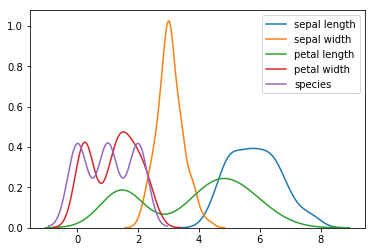

In [75]:
for x in flowers:
    sns.kdeplot(flowers[str(x)])

In [82]:
flowers['petal length'].head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal length, dtype: float64

In [77]:
leaf=flowers['sepal length']

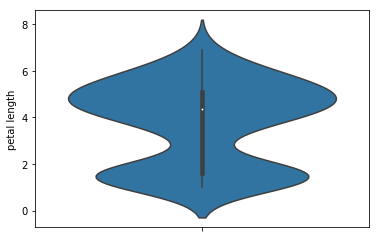

In [78]:
sns.violinplot(y='petal length', data=flowers)

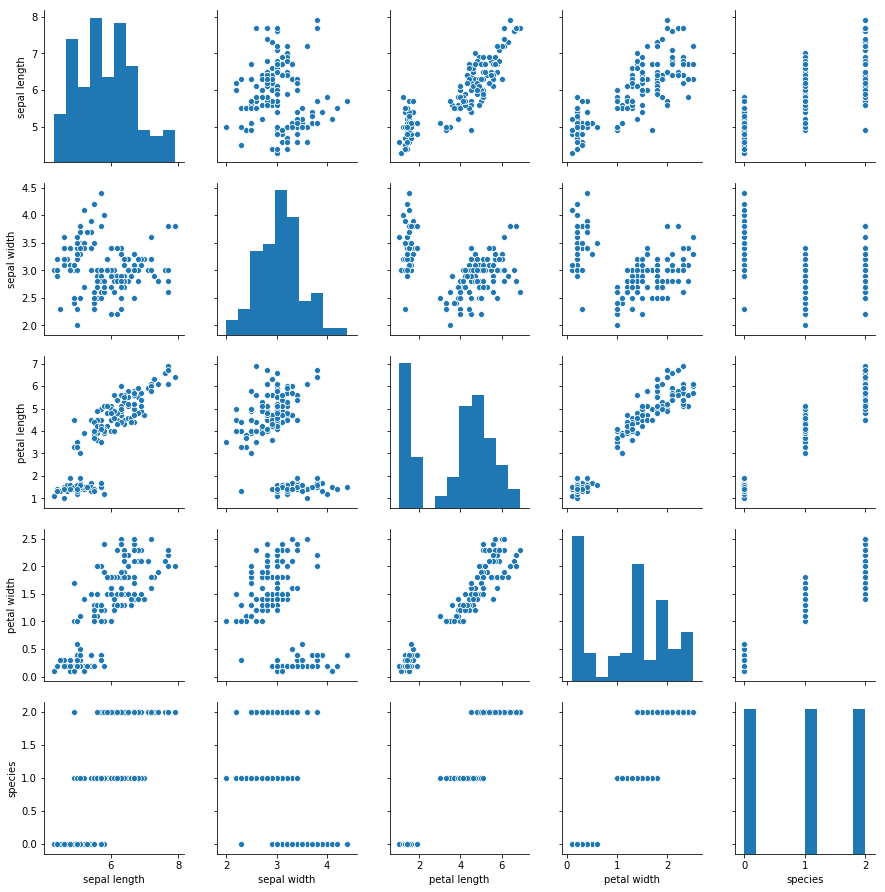

In [79]:
sns.pairplot(flowers)

C:\Users\Poli\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Poli\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


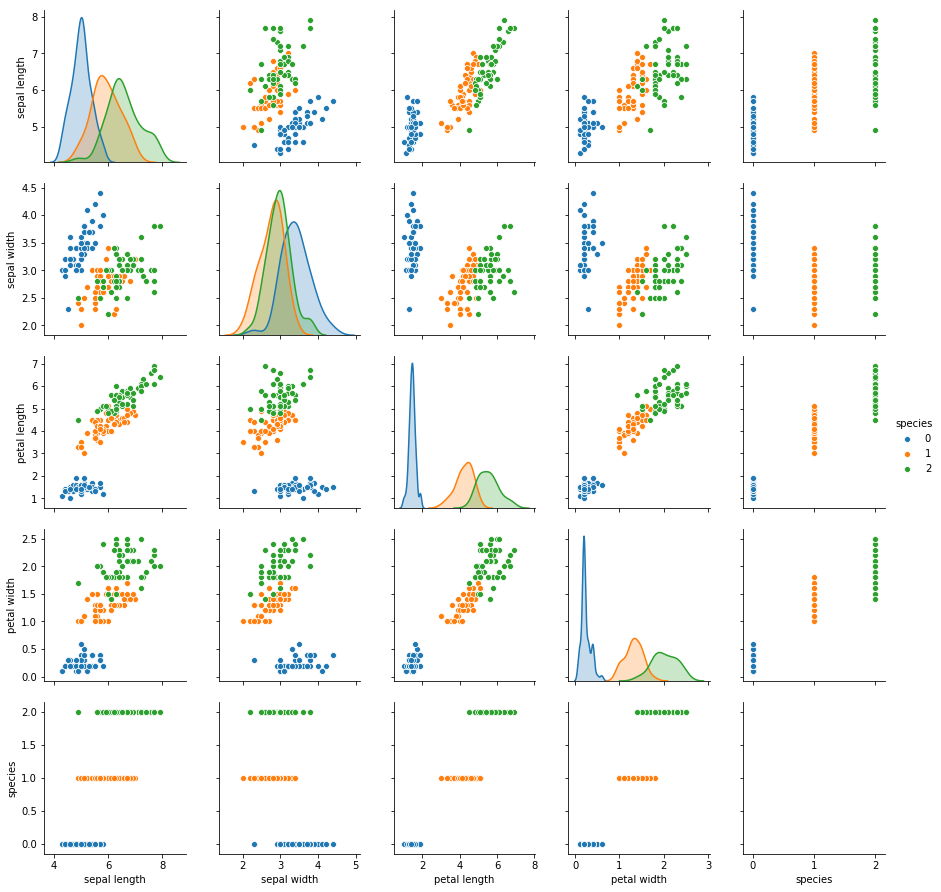

In [80]:
sns.pairplot(flowers,hue="species")

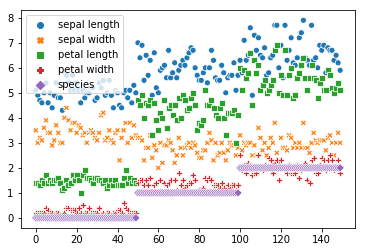

In [81]:
sns.scatterplot(data=flowers)

In [83]:
my_stat=pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [84]:
my_stat['V5']=my_stat.V1+my_stat.V4


In [85]:
my_stat['V6']=np.log(my_stat.V2)

In [87]:
my_stat.rename(columns = { 'V1' : 'session_value',

'V2' : 'group',

'V3' : 'time',

'V4' : 'n_users'}).head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [88]:
my_stat_na=pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_na.csv')

In [90]:
my_stat_na.head()

,group,n_users,session_value,time
0,9.0,-9.0,1.0,A
1,10.0,8.0,2.0,B
2,10.0,-1.0,4.0,A
3,10.0,-0.0,0.0,B
4,9.0,-15.0,-1.0,B


In [91]:
my_stat_na.session_value=my_stat_na.session_value.replace({None : 0})


In [92]:
m=my_stat_na.query('n_users>=0').n_users.median()

In [93]:
m


7.0

In [94]:
d=my_stat_na.query(('n_users<0 | n_users==-0.0')).n_users

In [103]:
d.head()

0    -9.0
2    -1.0
3    -0.0
4   -15.0
5   -16.0
Name: n_users, dtype: float64

In [96]:
my_stat_na.n_users=my_stat_na.n_users.replace(to_replace=d, value=m)

In [102]:
my_stat_na.head()

,group,n_users,session_value,time
0,9.0,7.0,1.0,A
1,10.0,8.0,2.0,B
2,10.0,7.0,4.0,A
3,10.0,7.0,0.0,B
4,9.0,7.0,-1.0,B


In [98]:
my_stat=pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_na.csv')

In [99]:
mean_session_value_data=my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'})
mean_session_value_data=mean_session_value_data.rename(columns= {'session_value' : 'mean_session_value'})

In [100]:
mean_session_value_data=my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'})


In [101]:
mean_session_value_data

,group,session_value
0,7.0,0.000000
1,8.0,-0.303030
2,9.0,0.160377
3,10.0,-0.048128
4,11.0,0.114754
5,12.0,-0.382353
6,13.0,0.000000
